In [5]:
#para manipulação de dados
import pandas as pd
import numpy as np

#para gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

#para modelagem
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

### Settings ###########
pd.set_option("max_colwidth", 1000)
pd.set_option("max_rows", 20)
pd.set_option("max_columns", 1000)
pd.set_option("precision", 2)
pd.options.display.float_format = "{:,.2f}".format
plt.style.use("classic")
%load_ext nb_black


OptionError: 'Pattern matched multiple keys'

In [6]:
#importando dataset
df = pd.read_csv('C:/Users/toazz/OneDrive/Documentos/brutos/wage_train.csv', index_col=0)

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education_num: continuous.
marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital_gain: continuous.
capital_loss: continuous.
hours_per_week: continuous.
native_country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
yearly_wage: >50K, <=50K.


In [213]:
#visualizando alguns dados
df.head(600)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage_ >50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,23,?,99399,Some-college,10,Never-married,?,Unmarried,Amer-Indian-Eskimo,Female,0,0,25,United-States,0
596,42,Self-emp-not-inc,214242,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,50,United-States,1
597,25,Private,200408,Some-college,10,Never-married,Tech-support,Not-in-family,White,Male,2174,0,40,United-States,0
598,49,Private,136455,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States,0


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                32560 non-null  int64 
 1   workclass          32560 non-null  object
 2   fnlwgt             32560 non-null  int64 
 3   education          32560 non-null  object
 4   education_num      32560 non-null  int64 
 5   marital_status     32560 non-null  object
 6   occupation         32560 non-null  object
 7   relationship       32560 non-null  object
 8   race               32560 non-null  object
 9   sex                32560 non-null  object
 10  capital_gain       32560 non-null  int64 
 11  capital_loss       32560 non-null  int64 
 12  hours_per_week     32560 non-null  int64 
 13  native_country     32560 non-null  object
 14  yearly_wage_ >50K  32560 non-null  uint8 
dtypes: int64(6), object(8), uint8(1)
memory usage: 4.8+ MB


In [215]:
#analisando colunas
df.sex.value_counts(normalize = True)

 Male      0.669195
 Female    0.330805
Name: sex, dtype: float64

# ANÁLISE DESCRITIVA


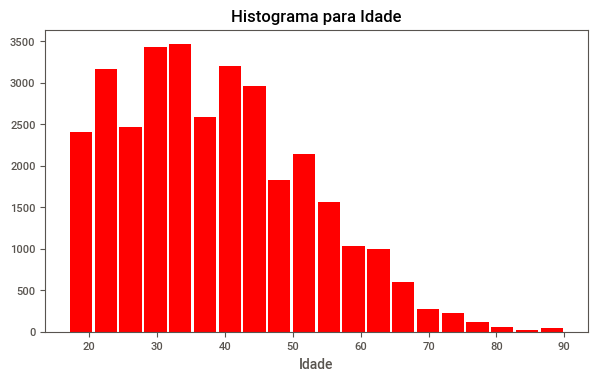

In [216]:
#Histograma para idade:
_ = plt.figure(figsize=(7, 4))
_ = plt.hist(data=df, x="age", bins=20, rwidth=0.9, color="red")
_ = plt.xlabel("Idade")
_ = plt.title("Histograma para Idade")

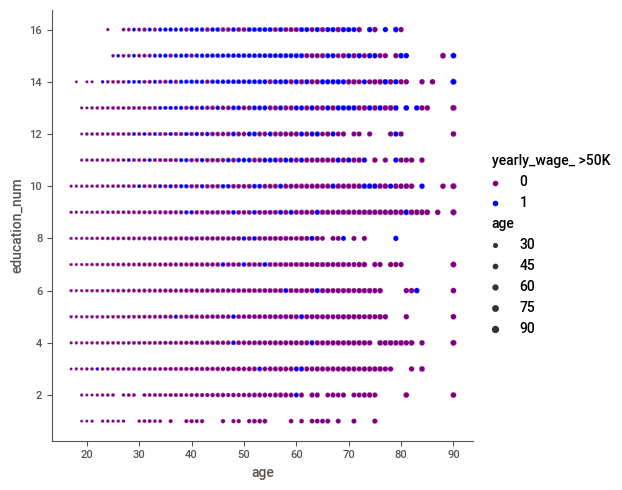

In [217]:

_ = sns.relplot(
    x="age",
    y="education_num",
    hue="yearly_wage_ >50K",
    palette=["purple", "blue"],
    size="age",
    data=df,
)

In [229]:
#Convertendo "yearly_wage" a dummy variável:
df = pd.get_dummies(df, columns=['yearly_wage'], drop_first=True)




KeyError: "None of [Index(['yearly_wage'], dtype='object')] are in the [columns]"

In [230]:
features = ['age', 'education_num','relationship', 'marital_status','hours_per_week', 'capital_gain', 'capital_loss', 'education']
target = 'yearly_wage_ >50K'




In [231]:
# Agora, dividimos antes de qualquer pré-processamento
X = df[features]  # Features
y = df[target]  # Labels

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=999
)

In [232]:
# Tratando as variáveis categóricas
cat_features = ['education','relationship', 'marital_status']
num_features = ['education_num', 'hours_per_week', 'age', 'capital_gain', 'capital_loss']

In [233]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=cat_features)

X_train = encoder.fit_transform(X_train)

X_train.head()

,age,education_num,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,relationship_6,marital_status_1,marital_status_2,...,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16
13282,46,10,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19322,45,14,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6490,46,9,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
30794,34,9,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5593,66,9,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [234]:
X_test = encoder.transform(X_test)

X_test.head()



,age,education_num,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,relationship_6,marital_status_1,marital_status_2,...,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16
26154,64,16,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2043,53,13,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2528,49,14,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
574,29,13,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13929,34,9,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
clf_RF = RandomForestClassifier()  # instanciar (= inicializar, criar o objeto)
clf_RF.fit(X_train, y_train)  # treina o modelo

RandomForestClassifier()

In [236]:
# aplica no teste
y_pred = clf_RF.predict(X_test)

y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [237]:
# metricas de avaliacao
from sklearn.metrics import accuracy_score

print("Acurácia: " + str(accuracy_score(y_test, y_pred)))  # acertos ao todo

from sklearn.metrics import f1_score

print(
    "F1 Score: {}".format(f1_score(y_test, y_pred))
)  # indica poucos falsos positivos e falsos negativos, quanto mais próximo de 1, melhor

Acurácia: 0.8424447174447175
F1 Score: 0.6504655916420623


In [238]:
y_pred


array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [210]:
# FEATURE IMPORTANCE
feature_imp = pd.Series(clf_RF.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
feature_imp


age                 0.251310
hours_per_week      0.151194
capital_gain        0.149249
marital_status_1    0.110440
education_num       0.086976
capital_loss        0.052394
relationship_1      0.048276
marital_status_2    0.028578
education_4         0.015953
relationship_3      0.015314
relationship_6      0.011771
education_2         0.011367
relationship_5      0.009567
education_3         0.007572
relationship_4      0.007189
marital_status_4    0.006669
education_11        0.004733
education_16        0.004484
education_1         0.004084
education_8         0.002742
education_13        0.002366
education_5         0.002181
relationship_2      0.002124
education_10        0.002064
education_14        0.001798
education_9         0.001762
marital_status_5    0.001749
education_7         0.001499
marital_status_6    0.001493
marital_status_3    0.001219
education_6         0.000658
marital_status_7    0.000621
education_12        0.000404
education_15        0.000197
dtype: float64

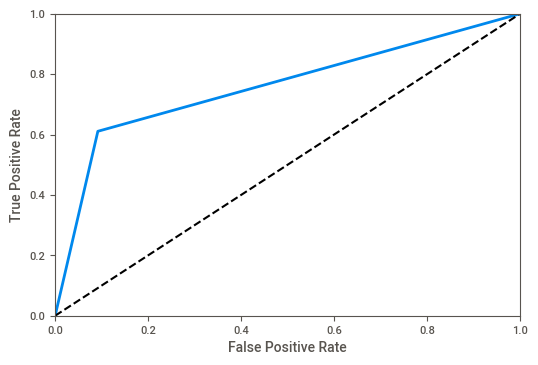

In [211]:
# CURVA ROC: calcula fpr e tpr para vários limiares
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# probabilidades
# probs = clf_RF.predict_proba(X_test)

y_scores = cross_val_predict(clf_RF, X_test, y_test)

# obtem fpr, tpr e limites
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")


plot_roc_curve(fpr, tpr)


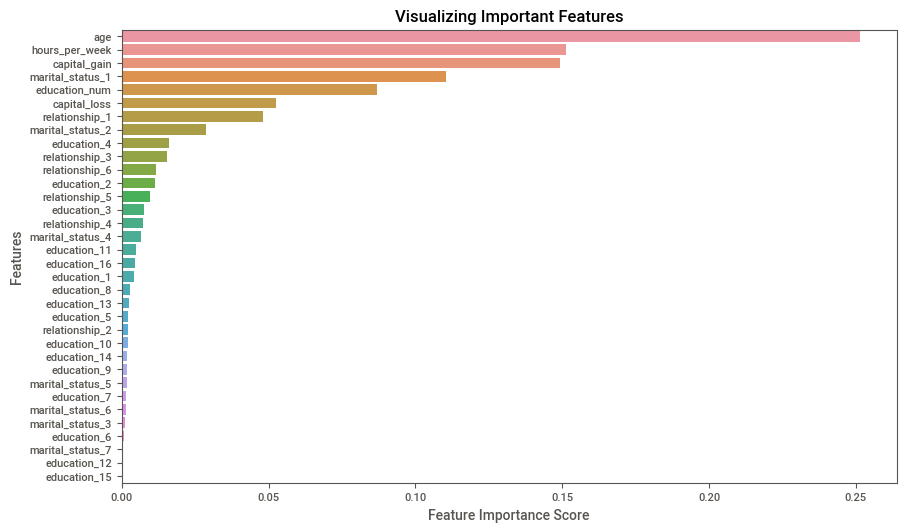

In [212]:
# Criando bar plot
_ = plt.figure(figsize=(10, 6))
_ = sns.barplot(x=feature_imp, y=feature_imp.index)


_ = plt.xlabel("Feature Importance Score")
_ = plt.ylabel("Features")
_ = plt.title("Visualizing Important Features")
_ = plt.savefig("rf_features.png")